<a href="https://colab.research.google.com/github/JeskaOak/dio-desafio-python/blob/main/desafio_python.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Importando Bibliotecas

In [132]:
# Importandoas bibliotecas
import pandas as pd
import matplotlib.pyplot as plt
plt.style.use("seaborn")
import numpy as np

## Leitura de DataFrame

In [133]:
# Criando nosso DataFrame
df = pd.read_excel('/content/drive/MyDrive/Colab Notebooks/Dio/AdventureWorks.xlsx')

## Conhecendo o DataSet



1.   Visualizando as 3 primeiras linhas
2.   Puxando o total de linhas e colunas
3.   Conhecendo o tipo de dado em cada coluna



In [134]:
# Visualizando as 3 primeiras linhas
df.head(3)

,Data Venda,Data Envio,ID Loja,ID Produto,ID Cliente,No. Venda,Custo Unitário,Preço Unitário,Quantidade,Valor Desconto,Valor Venda,Produto,Fabricante,Marca,Classe,Cor
0,2008-05-09,2008-05-29,199,384,18839,200805093CS607,348.58,758.0,6,0.0,4548.0,Adventure Works Laptop15.4W M1548 Red,Adventure Works,Adventure Works,Regular,Red
1,2008-05-12,2008-05-17,306,384,19051,200805123CS567,348.58,758.0,6,0.0,4548.0,Adventure Works Laptop15.4W M1548 Red,Adventure Works,Adventure Works,Regular,Red
2,2008-05-14,2008-05-20,306,384,19052,200805143CS576,348.58,758.0,6,0.0,4548.0,Adventure Works Laptop15.4W M1548 Red,Adventure Works,Adventure Works,Regular,Red


In [104]:
# Visualizando total de linhas e colunas
df.shape

(904, 16)

In [105]:
# Conhecendo o tipo de dado em cada colunas
df.dtypes

Data Venda        datetime64[ns]
Data Envio        datetime64[ns]
ID Loja                    int64
ID Produto                 int64
ID Cliente                 int64
No. Venda                 object
Custo Unitário           float64
Preço Unitário           float64
Quantidade                 int64
Valor Desconto           float64
Valor Venda              float64
Produto                   object
Fabricante                object
Marca                     object
Classe                    object
Cor                       object
dtype: object

## Editando o Dataset



*   Alterando tipo de dado da coluna
*   Verificação de valores nulos
*   Criando novas colunas
*   Alterando ordem das colunas



In [143]:
# Alterando o tipo de dado da coluna ID Loja, ID Produto, ID cliente de int para object pois não faremos cálculos com essas variáveis
df["ID Loja"] = df["ID Loja"].astype("object")
df["ID Produto"] = df["ID Produto"].astype("object")
df["ID Cliente"] = df["ID Cliente"].astype("object")



In [144]:
# Checando se as alterações funcionaram
df.dtypes

ID Loja                    object
ID Produto                 object
ID Cliente                 object
No. Venda                  object
Data Venda         datetime64[ns]
Data Envio         datetime64[ns]
Prazo Entrega     timedelta64[ns]
Custo Unitário            float64
Preço Unitário            float64
Quantidade                  int64
Valor Desconto            float64
Valor Venda               float64
Custo Total               float64
Lucro                     float64
Produto                    object
Fabricante                 object
Marca                      object
Classe                     object
Cor                        object
dtype: object

In [145]:
# Verificando se há valores faltantes
df.isnull().sum()

ID Loja           0
ID Produto        0
ID Cliente        0
No. Venda         0
Data Venda        0
Data Envio        0
Prazo Entrega     0
Custo Unitário    0
Preço Unitário    0
Quantidade        0
Valor Desconto    0
Valor Venda       0
Custo Total       0
Lucro             0
Produto           0
Fabricante        0
Marca             0
Classe            0
Cor               0
dtype: int64

In [146]:
# Visualizando nomes das colunas
df.columns

Index(['ID Loja', 'ID Produto', 'ID Cliente', 'No. Venda', 'Data Venda',
       'Data Envio', 'Prazo Entrega', 'Custo Unitário', 'Preço Unitário',
       'Quantidade', 'Valor Desconto', 'Valor Venda', 'Custo Total', 'Lucro',
       'Produto', 'Fabricante', 'Marca', 'Classe', 'Cor'],
      dtype='object')

In [147]:
# Criando a coluna "Custo Total", que é a multiplicação das colunas Custo Unitário e Quantidade
df["Custo Total"] = df["Custo Unitário"] * (df["Quantidade"])

In [148]:
# Criando a coluna "Lucro", que é a diferença entre as colunas Valor Venda e Custo Total
df["Lucro"] = df["Valor Venda"] - (df["Custo Total"])

In [171]:
# Criando a coluna "Percentual Custo", que é o custo unitário dividido pelo preço unitário
df["Percentual Custo"] = round(df["Custo Unitário"] / df["Preço Unitário"]*100,2)

In [172]:
# Alterando ordem das colunas

df = df[['ID Loja', 'ID Produto', 'ID Cliente','No. Venda','Data Venda', 'Data Envio', 'Prazo Entrega', 
        'Custo Unitário', 'Preço Unitário', 'Quantidade',
       'Valor Desconto', 'Valor Venda', 'Custo Total', 'Lucro','Percentual Custo','Produto', 'Fabricante', 'Marca',
       'Classe', 'Cor']]



## Análise Exploratória



*   Lucro anual
*   Lucro por fabricantes
*   Quantidade de vendas anuais x Valor de Venda anuais
*   Produtos: Preços e Custos





> ### Lucro Anual



In [151]:
# Lucro por ano: Groupby feito por ano e soma da coluna Lucro
lucro_total_anual = round(df.groupby(df["Data Venda"].dt.year)["Lucro"].sum(),2)
lucro_total_anual


Data Venda
2008    1920077.71
2009    1577745.38
Name: Lucro, dtype: float64

In [152]:
# Cálculo da variação percentual do lucro entre os anos de 2008 e 2009
lucro_2008 = 1920077.71
lucro_2009 = 1577745.38
variacao_percentual = f"{(lucro_2009 - lucro_2008)/lucro_2008*100:.2f}%"

print(f"Houve uma queda no lucro de {variacao_percentual} em 2009.")




Houve uma queda no lucro de -17.83% em 2009.


In [153]:
# Criando um dataframe para as vendas de 2008 e 2009
df_vendas_2008 = df.loc[(df["Data Venda"].dt.year == 2008)] 
df_vendas_2009 = df.loc[(df["Data Venda"].dt.year == 2009)]

# Agrupando lucros por mês
visao_lucros_2008 = round(df_vendas_2008.groupby(df["Data Venda"].dt.month)["Lucro"].sum(),2)
visao_lucros_2009 = round(df_vendas_2009.groupby(df["Data Venda"].dt.month)["Lucro"].sum(),2)



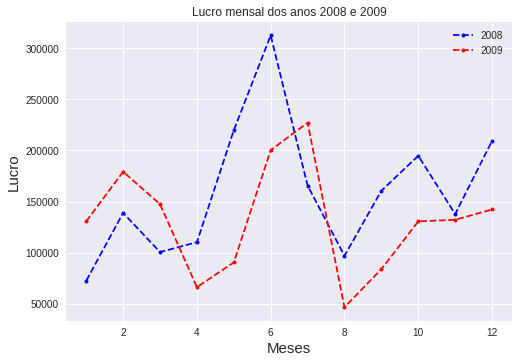

In [154]:
# Visualização mensal dos lucros nos anos de 2008 e 2009

# Definindo o que será plotado, neste caso, os lucros mensais de cada ano
plt.plot(visao_lucros_2008, linestyle='--', marker='o', color='blue', markersize=4);
plt.plot(visao_lucros_2009, linestyle='--', marker='o', color='red', markersize=4);

# Definindo labels dos eixos
plt.xlabel('Meses',fontsize=15)
plt.ylabel('Lucro', fontsize=15)

# Título do gráfico
plt.title('Lucro mensal dos anos 2008 e 2009')

# Legenda 
plt.legend(['2008', '2009'])



####  Considerações sobre o gráfico "Lucro Mensal dos anos 2008 e 2009"
- Em 2008 os lucros foram maiores que 2009 de abril até junho
- Em 2009 os lucros foram maiores que 2008 nos meses de: janeiro, fevereiro, março e julho
- O melhor mês de lucro em 2008 foi junho, já em 2009 foi julho
- O pior mês para 2008 foi janeiro, enquanto que em 2009 foi agosto



> ### Lucro por Fabricantes







In [155]:
# Soma do Lucro por fabricante usando groupby
fabricante_lucro_soma= round(df.groupby("Fabricante")["Lucro"].sum(),2)

# Valores em ordem decrescente
fabricante_lucro_soma.sort_values(ascending=False)

Fabricante
Fabrikam, Inc.     2591111.90
Adventure Works     712036.24
Contoso, Ltd        194674.95
Name: Lucro, dtype: float64

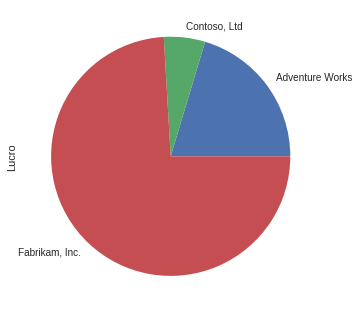

In [156]:
# Representatividade do Lucro por Fabricante: Considerando os anos de 2008 e 2009

df.groupby("Fabricante")["Lucro"].sum().plot.pie();

In [157]:
# Lucro dos Fabricantes em 2008
fabricante_lucro_2008= round(df_vendas_2008.groupby("Fabricante")["Lucro"].sum(),2)
fabricante_lucro_2008.sort_values(ascending=False)




Fabricante
Fabrikam, Inc.     1557020.55
Adventure Works     306641.16
Contoso, Ltd         56416.00
Name: Lucro, dtype: float64

In [158]:
# Lucro dos Fabricantes em 2009
fabricante_lucro_2009= round(df_vendas_2009.groupby("Fabricante")["Lucro"].sum(),2)
fabricante_lucro_2009.sort_values(ascending=False)

Fabricante
Fabrikam, Inc.     1034091.35
Adventure Works     405395.08
Contoso, Ltd        138258.95
Name: Lucro, dtype: float64

- A Fabrikam é a fabricante mais lucrativa nos 2 anos e Contoso, a menos lucrativa.



> ### Quantidade de vendas anuais x Valor de Venda anuais



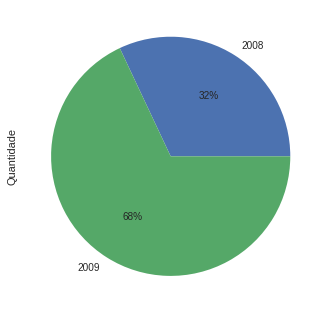

In [159]:
# Quantidade de vendas por ano
df.groupby(df["Data Venda"].dt.year)["Quantidade"].sum().plot.pie(autopct='%.0f%%');

In [160]:
# Cálculo da variação percentual da quantidade de vendas entre os anos de 2008 e 2009
qte_vendas_2008 = 18212
qte_vendas_2009 = 38695
variacao_percentual_vendas = f"{(qte_vendas_2009 - qte_vendas_2008)/qte_vendas_2008*100:.2f}%"

print(f"Houve um aumento na quantidade de vendas de {variacao_percentual_vendas} em 2009.")

Houve um aumento na quantidade de vendas de 112.47% em 2009.


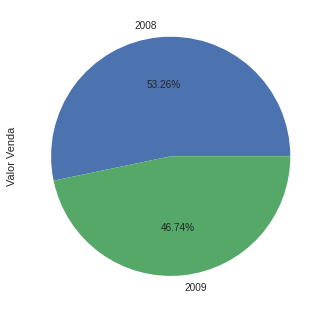

In [161]:
# Valor de venda por ano
df.groupby(df["Data Venda"].dt.year)["Valor Venda"].sum().plot.pie(autopct='%.2f%%');

In [162]:
valor_venda_anual= round(df.groupby(df["Data Venda"].dt.year)["Valor Venda"].sum(),2)
valor_venda_anual


Data Venda
2008    3187607.65
2009    2796998.49
Name: Valor Venda, dtype: float64

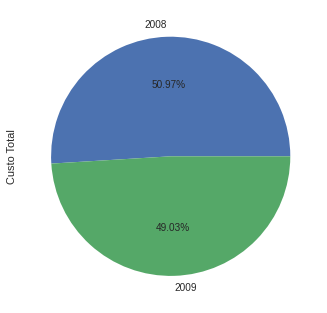

In [163]:
# Custo total por ano
df.groupby(df["Data Venda"].dt.year)["Custo Total"].sum().plot.pie(autopct='%.2f%%');

In [164]:
valor_custo_anual = round(df.groupby(df["Data Venda"].dt.year)["Custo Total"].sum(),2)
valor_custo_anual

Data Venda
2008    1267529.94
2009    1219253.11
Name: Custo Total, dtype: float64

In [165]:
# Ticket médio por ano
ticket_medio = round(df.groupby(df["Data Venda"].dt.year)["Valor Venda"].mean(),2)
ticket_medio

Data Venda
2008    6796.60
2009    6429.88
Name: Valor Venda, dtype: float64

- Vimos anteriormente que o ano de 2008 foi mais lucrativo que o ano de 2009. No entanto, a quantidade de vendas duplicaram em 2009. Por que o lucro não aumentou?
- Abaixo vamos verificar o preço unitário dos produtos assim como seu custo, para tentar responder a pergunta



> ### Produtos: Preços e Custos



In [166]:
# Groupby por produto + a quantidade de produtos vendidos em 2008
produtos_2008_tab = df_vendas_2008.groupby(df_vendas_2008["Produto"])["Quantidade"].sum()
produtos_2008_tab

Produto
Adventure Works Laptop15.4W M1548 Black             456
Adventure Works Laptop15.4W M1548 Red               452
Fabrikam Trendsetter 1/3'' 8.5mm X200 Black         582
Fabrikam Trendsetter 1/3'' 8.5mm X200 Grey          548
Fabrikam Trendsetter 1/3'' 8.5mm X200 White         394
Fabrikam Trendsetter 2/3'' 17mm X100 Black          517
Fabrikam Trendsetter 2/3'' 17mm X100 Grey           630
Headphone Adapter for Contoso Phone E130 Silver    7333
Headphone Adapter for Contoso Phone E130 White     7300
Name: Quantidade, dtype: int64

In [167]:
# Groupby por produto + a quantidade de produtos vendidos em 2009


In [168]:
# Criando uma lista de produtos e outras duas listas com a quantidade de vendas dos respectivos produtos separadas por ano
# Essas listas foram criadas com base nos 2 groupby acima (2008 e 2009)
# Os produtos que tem o mesmo modelo (ex: Laptop M1548 Black, Laptop M1548 Red), porém cores diferentes, foram unidos para facilitar a visualização

produtos = ['Laptop 15M1548','Trendsetter X200','Trendsetter X100','Headphone Adapter E130']      
produtos_2008 = [908, 1524, 1147, 14633]
produtos_2009 = [1228, 994, 866, 35607]

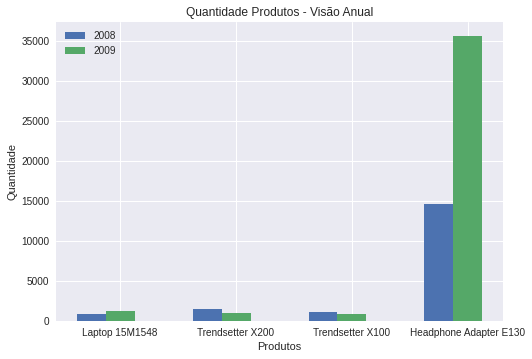

In [169]:
# Gráfico de coluna agrupada para verificarmos qual produto vendeu mais em cada ano

# Definindo a largura da barra
barWidth = 0.25

# Definindo a posição das barras
r1 = np.arange(len(produtos_2008))
r2 = [x + barWidth for x in r1]

# Criando as barras
plt.bar(r1,produtos_2008, width = barWidth, label='2008')
plt.bar(r2,produtos_2009, width = barWidth, label='2009')


# Add labels
plt.xlabel('Produtos')
plt.xticks([r + barWidth for r in range(len(produtos_2008))], produtos)
plt.ylabel('Quantidade')
plt.title('Quantidade Produtos - Visão Anual')
plt.legend()



In [173]:
# Verificando o preço unitário, custo unitário e percentual de custo de cada produto 
# Coluna preço unitário ordenada do maior para o menor

tabela_preco_custo = df.groupby(["Produto"])[["Preço Unitário", "Custo Unitário", "Percentual Custo"]].max()
tabela_preco_custo.sort_values("Preço Unitário",ascending=False)

,Preço Unitário,Custo Unitário,Percentual Custo
Produto,,,
Fabrikam Trendsetter 1/3'' 8.5mm X200 Black,999.00,330.99,33.13
Fabrikam Trendsetter 1/3'' 8.5mm X200 Grey,998.00,330.66,33.13
Fabrikam Trendsetter 1/3'' 8.5mm X200 White,998.00,330.66,33.13
Fabrikam Trendsetter 2/3'' 17mm X100 Black,980.00,324.69,33.13
Fabrikam Trendsetter 2/3'' 17mm X100 Grey,980.00,324.69,33.13
Adventure Works Laptop15.4W M1548 Black,758.00,348.58,45.99
Adventure Works Laptop15.4W M1548 Red,758.00,348.58,45.99
Headphone Adapter for Contoso Phone E130 Silver,9.99,5.09,50.95
Headphone Adapter for Contoso Phone E130 White,9.99,5.09,50.95




> ### Por que 2009 foi menos lucrativo que 2008?






> - No tópico "Lucro anual" vimos que o ano de 2008 foi mais lucrativo que o ano de 2009. 
- Em 2009, tivemos uma queda no lucro de 17,83%
- Em "Quantidade de vendas anuais x Valor de Venda Anuais" observamos que em 2009 a **quantidade** de vendas duplicou, ainda assim seu lucro anual foi inferior ao ano anterior. Porém, quando fazemos essa mesma comparação em **valor** percebemos que 2008 teve um valor de vendas maior.
- O produto mais vendido em 2009 foi "Headphone Adapter" - esse produto é o mais barato e tem o maior percentual de custo do dataset (50,95%).

Concluímos então que o lucro de 2009 foi menor, porque o seu produto mais vendido é o que tem maior percentual de custo, o que acaba diminuindo o seu lucro.

